In [49]:
#Option 1: Visualizing K-Means and DBSCAN

#After working with the visualizations for several minutes, it became clear which ones were more advantageous to 
#use in certain scenarios. Hyperparameters significantly affect this selection process between the two algorithms, 
#and often times the decision is quite obvious. For example, if it is clear to the programmer that there are a large
#collection of clusters distributed throughout a plane, then it would be naive to use the K-means clustering algorithm. 
#This is because K-means relies on the placement of centroids throughout a plane, and if there are countless datapoints
#evenly dispersed, it would be advantageous to use the alternative method of DBSCAN. DBSCAN is useful because it allows
#the programmer to set the hyperparameters for "epsilon" or the distance the algorithm extends beyond a point to form
#a cluster with other nearby points. DBSCAN also allows the programmer to set the minimum amount of points that must
#be contained within the epsilon distance. Although DBSCAN is useful for these cases, it requires the programmer to 
#set two hyperparameters, while K-means only involves one. If the user wants to run these algorithms unsupervised, 
#there will need to be a considerable amount of validation involved with the DBSCAN method as there are many more 
#permutations of possible hyperparameters that will impact the end result. However, when supervised, the DBSCAN method
#is far more effective than K-means. For example, when given a picture of a "smiley face," DBSCAN parses through each
#and every datapoint on the plane, slowly creating separate clusters which slowly grow in size. If this is done after
#settting reasonable hyperparameters (meaning setting hyperparameters which should generally not be impossible, such
#avoiding the use of a minisclue epsilon and an excessive amount of minimum points per cluster), DBSCAN will almost 
#always correctly cluster in an efficient and reliable manner. However, if K-means is used, it is highly unlikely and 
#virtually impossible that it will cluster the datapoints correctly. Because K-means relies on taking the distance 
#between each datapoint after setting centroids, and the "expression" of the smiley face is contained within a circular
#cluster, it is impossible to correctly group the datapoints in their separate clusters with any configuration of 
#centroids, regardless of whether or not this hyperparameter is randomly generated or decided by the programmer. 

#...K-means may also involve setting two hyperparameters: The amount of centroids and where the centroids are. 

#below is the example provided by the jupyter notebook and the completed second exercise. 

#I also attempted to generate my own random clustered data, but this does not count towards an exercise, it was my own project. 

%matplotlib inline
import numpy
import matplotlib.pyplot

from mpl_toolkits.mplot3d import Axes3D #3d plot

from sklearn.cluster import KMeans #k-means clustering
from sklearn import datasets #sklearn generated datasets

import pandas as pd

In [50]:
iris = datasets.load_iris()
wine = datasets.load_wine()
iris.keys()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [51]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df.head()

wine_df = pd.DataFrame(wine.data)
wine_df.columns = wine.feature_names
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [52]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
#each feature of wine represents an axis in cartesian coordinates
#I will plot alcohol, color, and magnesium

#X_FEATURE = 'alcohol' 
#Y_FEATURE = 'color_intensity' 
#Z_FEATURE = 'magnesium'

NUM_COLS = 4
NUM_ROWS = 6
FIG_WIDTH = 4 * NUM_COLS
FIG_HEIGHT = 3 * NUM_ROWS

def add_plot(figure, subplot_num, subplot_name, data, labels, X_FEATURE
            , Y_FEATURE, Z_FEATURE):

    axis = figure.add_subplot(NUM_ROWS, NUM_COLS, subplot_num, projection='3d',
                              elev=48, azim=134)

    axis.scatter(data[X_FEATURE], data[Y_FEATURE], data[Z_FEATURE], c=labels)

    for axis_obj in [axis.w_xaxis, axis.w_yaxis, axis.w_zaxis]:
        axis_obj.set_ticklabels([])

    axis.title.set_text(subplot_name)

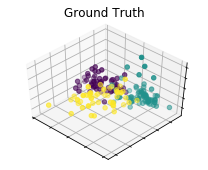

In [54]:
truth_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(truth_figure, 1, "Ground Truth", wine_df, wine.target, "alcohol",
        "color_intensity", "magnesium")

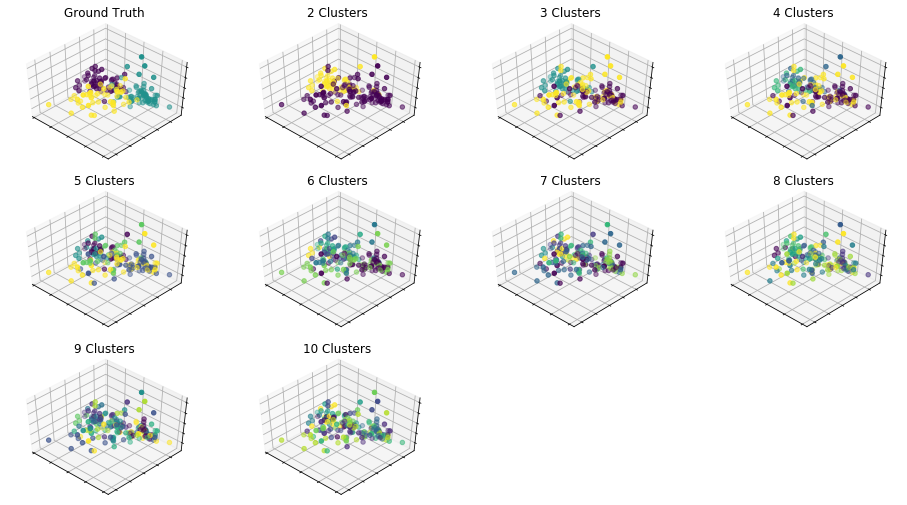

In [55]:
MAX_CLUSTERS = 10
# start a new figure to hold all of the subplots
kmeans_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(kmeans_figure, 1, "Ground Truth", wine_df, wine.target, "alcohol",
        "color_intensity", "magnesium")

plot_num = 2
for num_clusters in range(2, MAX_CLUSTERS + 1):
    
    model = KMeans(n_clusters=num_clusters)
    model.fit(wine_df)

    labels = model.labels_
    
    title = '{} Clusters'.format(num_clusters) 
    add_plot(kmeans_figure, plot_num, title, wine_df, labels.astype(numpy.float), 
            "alcohol", "color_intensity", "magnesium")
    plot_num += 1

# Exercise

1. Add [validation](https://jennselby.github.io/MachineLearningCourseNotes/#clustering-validation) to measure how good the clustering is, with different numbers of clusters.
1. Run the iris data through DBSCAN or hierarchical clustering and validate that as well.
1. Comment on the validation results, explaining which models did best and why you think that might be.

In [56]:
#1. I'll use the Adjusted Rand Index to validate the "3 Clusters" in relation to the established ground truth
#Source: https://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index

#2. I'll use sklearn DBSCAN to interpret the wine dataset and I'll use the same validation method
#Source: https://scikit-learn.org/stable/modules/clustering.html#dbscan

#3. Comments will be below: 

In [57]:
from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]

In [58]:
labels_pred = [0, 0, 1, 1, 2, 2]
metrics.adjusted_rand_score(labels_true, labels_pred)

#labels are the found values, and the index returns the score of 
#how similar the two lists are. 

#A drawback is that it requires the ground truth, so you can't really
#use adjusted rand if you're trying to cluster something that humans
#can't interpret. But with our data, we already have the ground truth.

0.24242424242424246

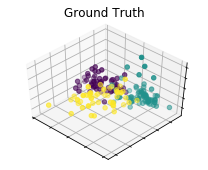

In [59]:
truth_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
add_plot(truth_figure, 1, "Ground Truth", wine_df, wine.target, "alcohol",
        "color_intensity", "magnesium")

In [60]:
#The wine.target is the ground truth array that we need. I need to 
#compare it to the generated data. 

labels_true = wine.target.tolist()

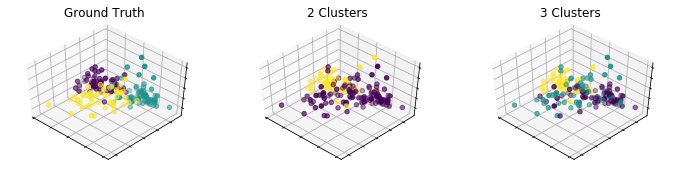

In [61]:
MAX_CLUSTERS = 3

kmeans_figure = matplotlib.pyplot.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Plot the ground truth
add_plot(kmeans_figure, 1, "Ground Truth", wine_df, wine.target, "alcohol",
        "color_intensity", "magnesium")

plot_num = 2
for num_clusters in range(2, MAX_CLUSTERS+1):
    
    model = KMeans(n_clusters=num_clusters)
    model.fit(wine_df)

    labels = model.labels_
    
    title = '{} Clusters'.format(num_clusters) 
    add_plot(kmeans_figure, plot_num, title, wine_df, labels.astype(numpy.float),
            "alcohol", "color_intensity", "magnesium")
    plot_num += 1

In [62]:
#labels for the "3 Clusters plot"
labels_pred = model.labels_

In [63]:
#This will print the adjusted rand score
#The perfect score is 1
metrics.adjusted_rand_score(labels_true, labels_pred)

0.37111371823084754

In [64]:
def validateClusters(data, target, max_clusters):

    kmeans_figure = matplotlib.pyplot.figure(figsize=(16, 18))

    add_plot(kmeans_figure, 1, "Ground Truth", data, target, "alcohol", 
            "color_intensity", "magnesium")

    plot_num = 2
    for num_clusters in range(2, MAX_CLUSTERS+1):
    
        model = KMeans(n_clusters=num_clusters)
        model.fit(wine_df)
    
        labels = model.labels_
    
        title = '{} Clusters'.format(num_clusters) 
        add_plot(kmeans_figure, plot_num, title, data, labels.astype(numpy.float)
                ,"alcohol", "color_intensity", "magnesium")
        plot_num += 1

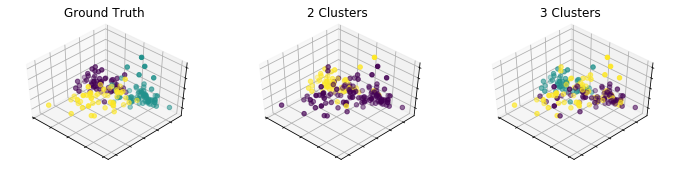

In [65]:
#Okay, so far my method shows the plots correctly. Let's continue. 
validateClusters(wine_df, wine.target, 3)

In [66]:
def validateClusters(data, target, max_clusters):

    kmeans_figure = matplotlib.pyplot.figure(figsize=(16, 18))

    add_plot(kmeans_figure, 1, "Ground Truth", data, target, "alcohol", 
            "color_intensity", "magnesium")

    plot_num = 2
    for num_clusters in range(2, MAX_CLUSTERS+1):
    
        model = KMeans(n_clusters=num_clusters)
        model.fit(wine_df)
    
        labels = model.labels_
    
        title = '{} Clusters'.format(num_clusters) 
        add_plot(kmeans_figure, plot_num, title, data, labels.astype(numpy.float)
                ,"alcohol", 
            "color_intensity", "magnesium")
        plot_num += 1
        
        labels_true = target.tolist()
        labels_pred = model.labels_
        print(metrics.adjusted_rand_score(labels_true, labels_pred))

0.3694075388574537
0.37111371823084754


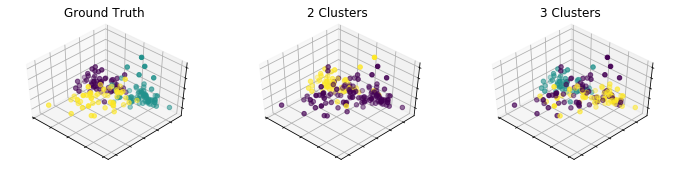

In [67]:
validateClusters(wine_df, wine.target, 3)

In [68]:
#Okay, great, but what do those numbers mean? Let's make it a little
#more clear. 

def validateClusters(data, target, max_clusters):

    kmeans_figure = matplotlib.pyplot.figure(figsize=(16, 18))

    add_plot(kmeans_figure, 1, "Ground Truth", data, target,"alcohol", 
            "color_intensity", "magnesium")

    plot_num = 2
    for num_clusters in range(2, MAX_CLUSTERS+1):
    
        model = KMeans(n_clusters=num_clusters)
        model.fit(wine_df)
    
        labels = model.labels_
    
        title = '{} Clusters'.format(num_clusters) 
        add_plot(kmeans_figure, plot_num, title, data, labels.astype(numpy.float),
                 "alcohol", 
            "color_intensity", "magnesium")
        plot_num += 1
        
        labels_true = target.tolist()
        labels_pred = model.labels_
        print("Adjusted Rand Index Score:", 
              metrics.adjusted_rand_score(labels_true, labels_pred),
              "for", num_clusters, "Clusters")

Adjusted Rand Index Score: 0.3694075388574537 for 2 Clusters
Adjusted Rand Index Score: 0.37111371823084754 for 3 Clusters


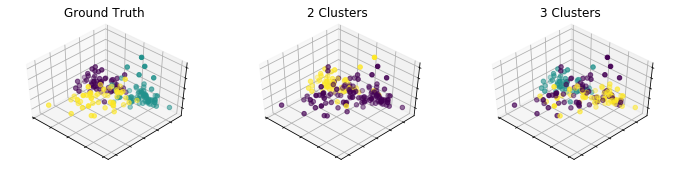

In [69]:
validateClusters(wine_df, wine.target, 3)

In [70]:
#Okay, that's great for now. I imagine it would be a little difficult
#to program the Adjusted Rand Index permuation model myself, mostly
#because I'm not experienced with advanced statistics. However, I 
#would like to learn more advanced statistics in the future. 

#Basically, for the adjusted rand index, the "similarities" between 
#the ground truth and the predicted values are placed into a 
#"Contingency Table" in which values are summed by rows and columns
#with the truth and predicted values are lined along the side and top
#of the table. The results of these summations are used in the 
#permutation model (which involves several sums and permuations), and 
#the whole expression returns the adjusted index value which we can
#use to determine just how close our predicted values are to the ground
#truth. That's my interpretation of Adjusted Rand Index at least. 

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


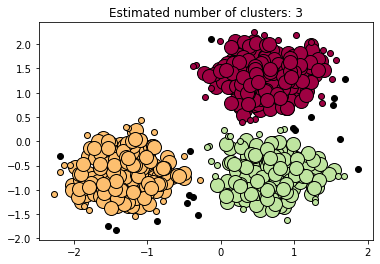

In [71]:
#sklearn DBSCAN demonstration
#This demonstration clusters a random dataset and also manages to validate
#it as well. 

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [72]:
#Okay, I'm going to modify the method I created previously to implement
#DBSCAN, so here goes...

def validateClusters(data, target, eps, samples):

    db_figure = matplotlib.pyplot.figure(figsize=(16, 18))

    add_plot(db_figure, 1, "Ground Truth", data, target, "alcohol", 
            "color_intensity", "magnesium")
        
    db = DBSCAN(eps, samples)
    db.fit(data)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    title = '{} Clusters'.format(n_clusters_ + 1) 
    
    add_plot(db_figure, plot_num, title, data, labels.astype(numpy.float), 
            "alcohol", 
            "color_intensity", "magnesium")
        
    labels_true = target.tolist()
    labels_pred = db.labels_
    print("Adjusted Rand Index Score:", 
        metrics.adjusted_rand_score(labels_true, labels_pred))

Adjusted Rand Index Score: 0.20850594205042042


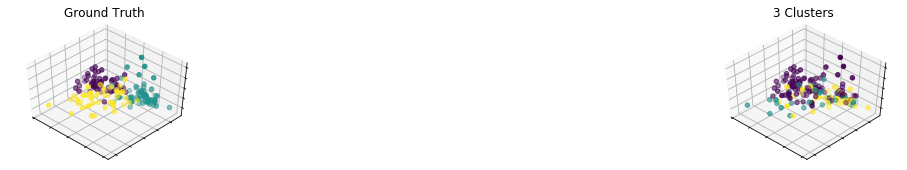

In [73]:
#Okay, interesting result, but not very good
validateClusters(wine_df, wine.target, 30, 13)

Adjusted Rand Index Score: 0.2909870077777171


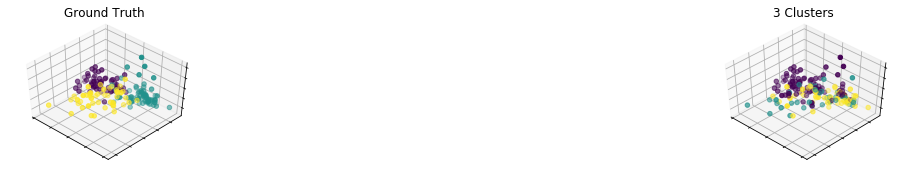

In [74]:
#A little better, but it could do better
validateClusters(wine_df, wine.target, 36, 17)

Adjusted Rand Index Score: 0.2801552646637755


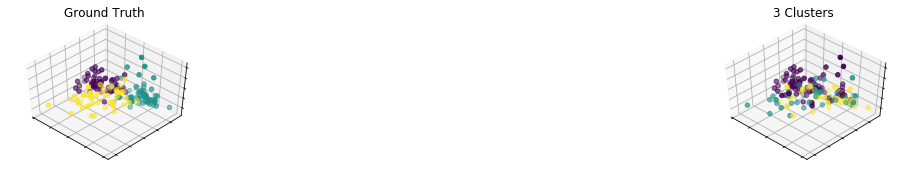

In [75]:
validateClusters(wine_df, wine.target, 35, 15)

Adjusted Rand Index Score: 0.28696014415266125


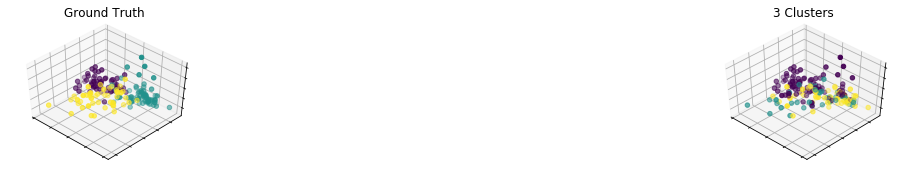

In [76]:
validateClusters(wine_df, wine.target, 31, 13)

Adjusted Rand Index Score: 0.31678824334681244


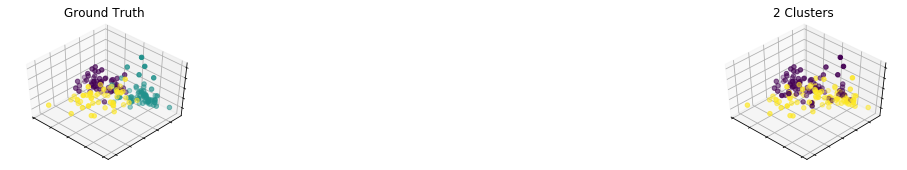

In [77]:
#It's only 2 clusters, but it has a better score
validateClusters(wine_df, wine.target, 35, 14)

Adjusted Rand Index Score: 0.37101747523328954


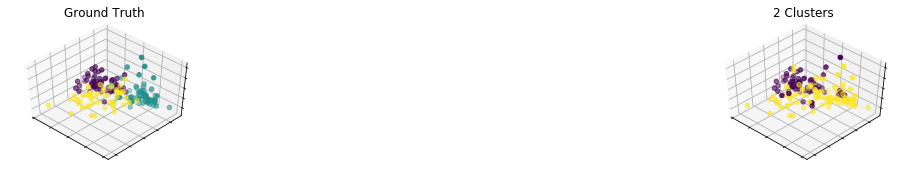

In [78]:
validateClusters(wine_df, wine.target, 70, 30)

In [79]:
#Okay, I'm going to create a method which only returns the score, so I 
#can use it for things 

def returnValidateClusters(data, target, eps, samples):
        
    db = DBSCAN(eps, samples)
    db.fit(data)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    title = '{} Clusters'.format(n_clusters_ + 1) 
        
    labels_true = target.tolist()
    labels_pred = db.labels_
    
    return metrics.adjusted_rand_score(labels_true, labels_pred)
        

In [80]:
#Okay, so I decided to optimize the score, not with Calculus, but simply
#by generating random values of epsilon and the amount of points, and it
#will only return the desirable values, or those above 0.3. I can change 
#this later. 
import random as rd

def optimizeScore(data, target):
    for x in range(100): 
        rdeps = rd.randint(1, 100)
        rdmins = rd.randint(1, 100)
        score = returnValidateClusters(data, target, rdeps, rdmins)
        if score > 0.3:
            print(score)
            print("")
            print("Epsilon: {}".format(rdeps))
            print("Sample: {}".format(rdmins))
            print("")
            
optimizeScore(wine_df, wine.target)

0.38225857562586585

Epsilon: 78
Sample: 35

0.3321873759810288

Epsilon: 66
Sample: 31

0.3712660477155204

Epsilon: 70
Sample: 32

0.3247294450224277

Epsilon: 53
Sample: 26

0.38261194291898387

Epsilon: 75
Sample: 25

0.38261194291898387

Epsilon: 75
Sample: 25

0.38261194291898387

Epsilon: 99
Sample: 39

0.38261194291898387

Epsilon: 77
Sample: 29

0.38261194291898387

Epsilon: 88
Sample: 33

0.38261194291898387

Epsilon: 95
Sample: 37

0.38021630600466655

Epsilon: 98
Sample: 45

0.3694075388574537

Epsilon: 92
Sample: 28



Adjusted Rand Index Score: 0.41656881944153223


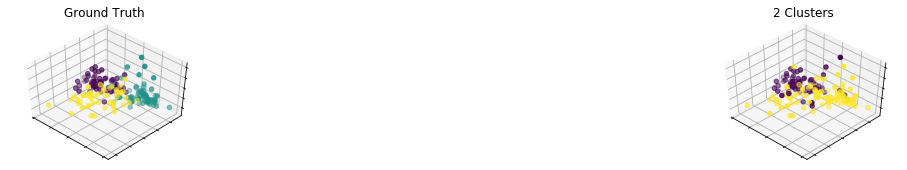

In [81]:
validateClusters(wine_df, wine.target, 57, 19)

In [82]:
#Okay, I allowed the loop to run 1000 times, and it only generated a few 
#values. 

def optimizeScore(data, target):
    for x in range(1000): 
        rdeps = rd.randint(1, 100)
        rdmins = rd.randint(1, 100)
        score = returnValidateClusters(data, target, rdeps, rdmins)
        if score > 0.4:
            print(score)
            print("")
            print("Epsilon: {}".format(rdeps))
            print("Sample: {}".format(rdmins))
            print("")
            
optimizeScore(wine_df, wine.target)

0.41656881944153223

Epsilon: 56
Sample: 19

0.40246885707531704

Epsilon: 70
Sample: 20

0.40246885707531704

Epsilon: 74
Sample: 22

0.41656881944153223

Epsilon: 56
Sample: 20



Adjusted Rand Index Score: 0.4066149318910343


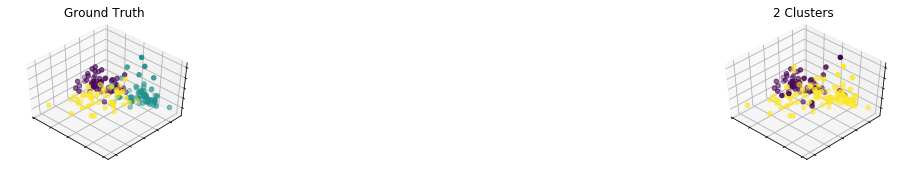

In [83]:
validateClusters(wine_df, wine.target, 81, 25)

In [84]:
#The DBSCAN seems to get the best results according to the Adjusted Rand
#Index when it uses 2 clusters with the wine dataset. 

In [85]:
#This new validateClusters function can use multiple datasets, even the 
#iris one. 

def genValidateClusters(data, target, eps, samples, X_FEATURE, Y_FEATURE, 
                     Z_FEATURE):

    db_figure = matplotlib.pyplot.figure(figsize=(16, 18))

    add_plot(db_figure, 1, "Ground Truth", data, target, X_FEATURE, 
            Y_FEATURE, Z_FEATURE)
        
    db = DBSCAN(eps, samples)
    db.fit(data)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    title = '{} Clusters'.format(n_clusters_ + 1) 
    
    add_plot(db_figure, plot_num, title, data, labels.astype(numpy.float), 
            X_FEATURE, 
            Y_FEATURE, Z_FEATURE)
        
    labels_true = target.tolist()
    labels_pred = db.labels_
    print("Adjusted Rand Index Score:", 
        metrics.adjusted_rand_score(labels_true, labels_pred))

Adjusted Rand Index Score: 0.4066149318910343


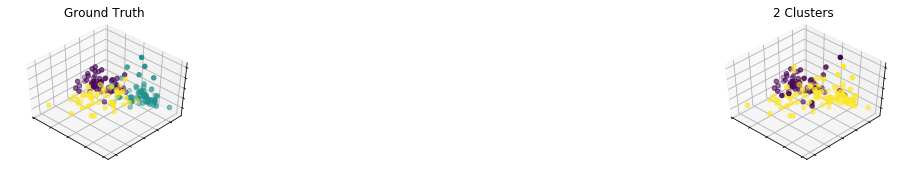

In [86]:
genValidateClusters(wine_df, wine.target, 81, 25, "alcohol", "color_intensity",
                "magnesium")

In [87]:
#I'll now attempt the same process with the iris dataset
iris_df.head(n = 3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [88]:
#Optimizing the score of the iris dataset gave far better results than
#with the wine dataset. 

optimizeScore(iris_df, iris.target)

0.5417913841497282

Epsilon: 1
Sample: 40

0.5681159420289855

Epsilon: 2
Sample: 80

0.5560753044129078

Epsilon: 1
Sample: 30

0.4173914293518106

Epsilon: 1
Sample: 49

0.5681159420289855

Epsilon: 2
Sample: 69

0.5417913841497282

Epsilon: 1
Sample: 42



Adjusted Rand Index Score: 0.5681159420289855


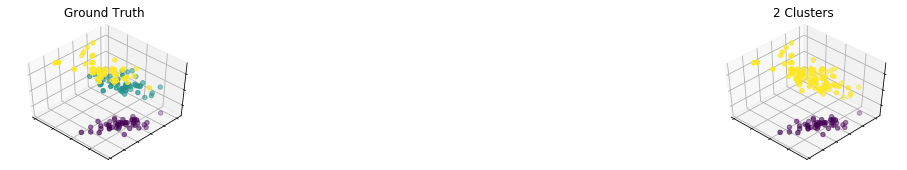

In [89]:
genValidateClusters(iris_df, iris.target, 2, 84, "sepal length (cm)"
                    , "sepal width (cm)",
                "petal length (cm)")

Adjusted Rand Index Score: 0.5621364251426576


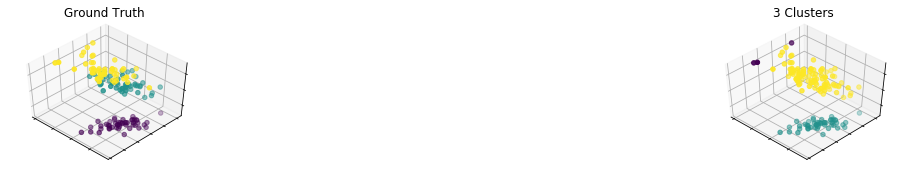

In [90]:
genValidateClusters(iris_df, iris.target, 1, 19, "sepal length (cm)"
                    , "sepal width (cm)",
                "petal length (cm)")

Adjusted Rand Index Score: 0.5681159420289855


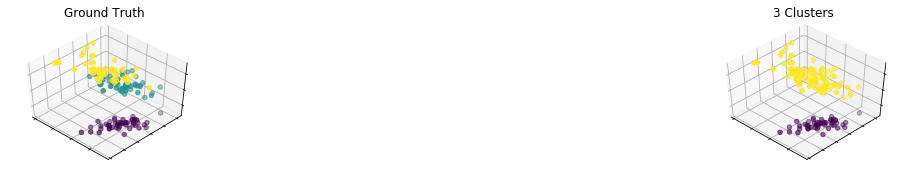

In [91]:
genValidateClusters(iris_df, iris.target, 1, 8, "sepal length (cm)"
                    , "sepal width (cm)",
                "petal length (cm)")

Adjusted Rand Index Score: 0.5417913841497282


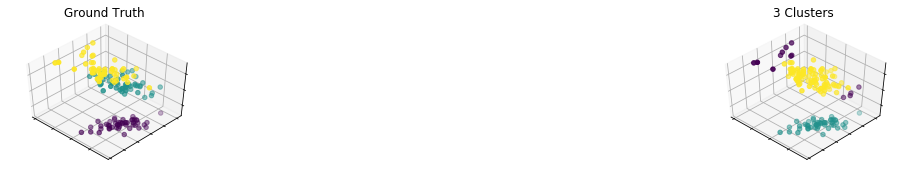

In [92]:
genValidateClusters(iris_df, iris.target, 1, 42, "sepal length (cm)"
                    , "sepal width (cm)",
                "petal length (cm)")

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Text(0.5, 1.0, 'Points')

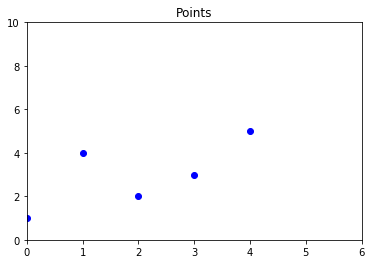

In [94]:
#Test plot
plt.plot([0, 1, 2, 3, 4], [1, 4, 2, 3, 5], 'bo')
plt.axis([0, 6, 0, 10])
plt.title("Points")

In [95]:
#Program blob generator

def genXVals(n_points, Xmin, Xmax):
    xVals = []
    for x in range(n_points):
        xVals.append(rd.randint(Xmin, Xmax))
    return xVals

def genYVals(n_points, Ymin, Ymax): 
    yVals = []
    for y in range(n_points):
        yVals.append(rd.randint(Ymin, Ymax))
    return yVals

X value: [7, 0, 7, 9, 6, -10, -4, -5, 1, -1, 7, -4, -9, -4, 5, -5, -2, -1, -8, -8]
Y value: [3, -3, 2, -10, 9, 3, -1, 6, -9, -6, -9, 7, -3, 4, -10, 1, 0, -9, -7, -2]
X value: [-20, -27, -15, -28, -10, -13, -17, -21, -20, -27, -17, -14, -25, -30, -15, -16, -30, -22, -29, -21, -30, -23, -18, -17]
Y value: [35, 59, 65, 39, 47, 38, 32, 55, 59, 65, 64, 53, 60, 58, 30, 57, 43, 69, 40, 59, 37, 68, 55, 33]
X value: [9, 10, 3, 5, 6, 8, 10, 10, 8, 0, 7, 3, 6, 10, 3, 3, 10, 9]
Y value: [75, 69, 77, 55, 71, 59, 78, 76, 62, 81, 66, 80, 71, 81, 78, 64, 82, 80]


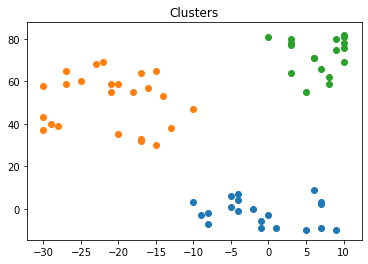

In [96]:
def plot_cluster(n_point, Xmin, Xmax, Ymin, Ymax):  
    x = genXVals(n_point, Xmin, Xmax)
    y = genYVals(n_point, Ymin, Ymax)
    plt.scatter(x, y)
    print("X value: {}".format(x))
    print("Y value: {}".format(y))

plot_cluster(20, -10, 10, -10, 10)
plot_cluster(24, -30, -10, 30, 70)
plot_cluster(18, 0, 10, 55, 85)
plt.title("Clusters")
plt.show()

In [97]:
x1 = [10, -2, 3, -5, 6, -4, -8, -1, 2, -10, 7, -3, 9, -8, 7, 3, 8, 2, 3, -4]
x2 = [-14, -16, -16, -27, -25, -12, -13, -13, -20, -28, -15, -27, -16, -10, -21, -19, -17, -13, -28, -30, -11, -23, -19, -13]
x3 = [7, 9, 9, 0, 2, 3, 8, 1, 7, 3, 7, 0, 4, 4, 9, 2, 8, 10]
xVal = x1 + x2 + x3

y1 = [-3, 3, 6, -2, 7, -7, 6, -10, -6, 4, 2, 0, 7, 3, 5, -7, 7, 5, 1, 9]
y2 = [34, 64, 64, 50, 32, 52, 53, 68, 43, 53, 68, 55, 39, 50, 42, 45, 61, 53, 52, 66, 46, 68, 69, 69]
y3 = [60, 56, 69, 55, 72, 85, 76, 69, 63, 72, 79, 76, 72, 62, 56, 66, 73, 72]
yVal = y1 + y2 + y3

data = {"X": xVal, "Y": yVal}
df = pd.DataFrame(data)
df.head(n = 3)

,X,Y
0,10,-3
1,-2,3
2,3,6


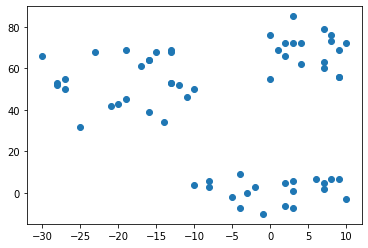

In [98]:
plt.scatter(xVal, yVal)
plt.show()
#Unclassified points on the plane
#...